In [1]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import requests

In [162]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 Diamond Shape

In [3]:
def diamond(n):
    for i in range(n):
        print(" "*(n-i) + "*"*(2*i+1))
    for i in range(n-2,-1,-1):
        print(" "*(n-i) + "*"*(2*i+1))

In [4]:
diamond(5)

     *
    ***
   *****
  *******
 *********
  *******
   *****
    ***
     *


# Q2. 刪除重複性的資料

In [5]:
with open('symbols01.txt', 'r') as f01:
    symbols01 = f01.read()
    list01 = list(symbols01.strip().split("\n"))
    
with open('symbols02.txt') as f02:
    symbols02 = f02.read()
    list02 = list(symbols02.strip().split("\n"))

In [6]:
symbols03 = set(list01 + list02)

In [7]:
symbols03

{'ABCD',
 'ABDC',
 'ABUS',
 'ACFC',
 'ACMR',
 'ACRX',
 'ACSF',
 'ADAP',
 'ADES',
 'ADMA',
 'ADMP',
 'ADRE',
 'ADRO',
 'ADVM',
 'ADXS',
 'AGFS',
 'AGRX',
 'AHPA',
 'AINV',
 'AIRG',
 'AIRR',
 'AKTS',
 'AKTX',
 'ALDX',
 'ALJJ',
 'ALLT',
 'ALPN',
 'ALRN',
 'ALSK',
 'AMBCW',
 'AMD',
 'AMRS',
 'APOP',
 'APPS',
 'ARCT',
 'ARDX',
 'ARQL',
 'ASCMA',
 'ASFI',
 'ASNS',
 'ASPU',
 'ASUR',
 'ASV',
 'ASYS',
 'ATAC',
 'ATAI',
 'ATAX',
 'ATTU',
 'AUBN',
 'AUDC',
 'AUTO',
 'AVDL',
 'AVID',
 'AVXL',
 'AXON',
 'AXSM',
 'AXTI',
 'BANX',
 'BCAC',
 'BCOV',
 'BDSI',
 'BEBE',
 'BGFV',
 'BKCC',
 'BKEP',
 'BKEPP',
 'BLCM',
 'BLFS',
 'BLPH',
 'BLVD',
 'BOCH',
 'BOXL',
 'BRAC',
 'BRID',
 'BRPA',
 'BRQS',
 'BV',
 'BVXV',
 'BYBK',
 'CAAS',
 'CALL',
 'CAMT',
 'CART',
 'CBAN',
 'CBAY',
 'CBFV',
 'CBIO',
 'CBMG',
 'CCLP',
 'CCUR',
 'CCXI',
 'CDNA',
 'CDOR',
 'CDTX',
 'CDXC',
 'CDXS',
 'CECE',
 'CELC',
 'CELH',
 'CEMI',
 'CETXP',
 'CFMS',
 'CGEN',
 'CGNT',
 'CGO',
 'CHRS',
 'CHW',
 'CIZN',
 'CKPT',
 'CLAR',
 'CLFD',
 'C

In [8]:
with open('symbols03.txt', 'w') as f:
    for symbol in symbols03:
        f.write(symbol.strip().upper() + "\n")

# Q3.下載台灣上市公司基本資料

In [9]:
import requests

In [10]:
r = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")
r.encoding = "BIG5"
data = r.text.split("\r\n")

In [11]:
data

['106年12月11日17:30:01公司基本資料,',
 '"公司代號","公司名稱","產業別","住址","營利事業統一編號","董事長","總經理","發言人","發言人職稱","代理發言人",總機電話","成立日期","上市日期","普通股每股面額","實收資本額","私募股數","特別股","編制財務報表類型","股票過戶機構","過戶電話","過戶地址","英文簡稱","英文通訊地址","傳真機號碼","電子郵件信箱","網址" ',
 '"1101","台灣水泥股份有限公司","水泥工業","台北市中山北路2段113號","11913502","張安平","李鐘培","黃健強","資深副總經理","蔡立文","(02)2531-7099","19501229","19620209","新台幣                 10.0000元","42465090100","0","0","1","中國信託商業銀行代理部","66365566","台北市重慶南路一段83號5樓","TCC","No.113, Sec.2, Zhongshan N. Rd.,Taipei City 104,Taiwan (R.O.C.)","(02)2531-6529","finance@taiwancement.com","http://www.taiwancement.com",',
 '"1102","亞洲水泥股份有限公司","水泥工業","台北市大安區敦化南路2段207號30、31樓","03244509","徐旭東","李坤炎","周維崑","副總經理","吳玲綾","02-2733-8000","19570321","19620608","新台幣                 10.0000元","33614471980","0","0","1","亞東證券股份有限公司","02-2361-8608","台北市重慶南路一段86號3樓","ACC","30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUTH ROAD,SEC.2,TAIPEI,TAIWAN,R.O.C","02-2378-5191","service@acc.com.tw","www.acc.com.tw",',
 '"1103","嘉新水泥股份有限公司

In [3]:
import pandas as pd
from io import StringIO

In [13]:
data = StringIO(r.text)
finaldata = pd.read_csv(data, skiprows=1)

In [14]:
finaldata

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,(02)2531-7099,...,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com,NaN
1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,02-2733-8000,...,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw,NaN
1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,(02)2551-5211,...,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw,NaN
1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,02-25077801,...,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com,NaN
1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,25092188,...,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw,NaN
1109,信大水泥股份有限公司,水泥工業,台北市寶慶路37號7樓,3279507.0,楊智雄,楊智雄,吳連富,副總經理,林坤榮,(02)23816731,...,1.0,中國信託商業銀行代理部,(02)6636-5566,台北巿重慶南路一段83號5樓,HsingTa,"7TH FL.,No.37 Pao Ching RoadTaipei Taiwan R.O.C.",23314086,service@hsingta.com.tw,www.hsingta.com.tw,NaN
1110,東南水泥股份有限公司,水泥工業,高雄市前金區五福三路21號4樓之1,83078600.0,陳敏斷,吳長直,黃薪翰,財務部經理,唐榮宗,07-2711121,...,1.0,元大證券股份有限公司,02-25865859,台北市承德路三段210號地下室1樓,TUNA CEMENT,"NO.21 Wu Fu 3 RoadKaohsiung, Taiwan, R.O.C.",07-9505895,southeast@secement.com,www.southeastcement.com.tw,NaN
1201,味全食品工業股份有限公司,食品工業,台北市松江路125號,11347802.0,陳永清,蘇守斌,張美凰,財務長,─,(02)25065020,...,1.0,元大證券股務代理部,(02)25865859,台北市大同區承德路3段210號地下一樓,Wei Chuan,"10F., No.125, Sung Chiang Rd.Taipei, Taiwan(R....",(02)25063182,service@weichuan.com.tw,http://www.weichuan.com.tw,NaN
1203,味王股份有限公司,食品工業,台北市中山北路二段79號5樓,7067309.0,陳清福,陳恭平,魏璟雄,經理,李兆弘,(02)25717271,...,1.0,群益金鼎證券股份有限公司,27023999,台北市敦化南路二段97號地下2樓,VE WONG,"5TH FL., 79 CHUNG SHAN N. RD., SEC.2TAIPEI TAIWAN",(02)25811006,wei@vewong.com.tw,http://www.vewong.com,NaN
1210,大成長城企業股份有限公司,食品工業,台南市永康區蔦松二街三號,73008303.0,韓家宇,莊坤炎,周叔恆,特助,常岡德,06-2531111,...,1.0,中國信託商業銀行代理部,02-66365566,台北市重慶南路一段八十三號六樓,GREATWALL,3 NIAOSUN 2TH STREETYONGKONG TAINAN CONTY TAIWAN,06-2534596,john@greatwall-group.com,http://www.dachan.com,NaN


# Q4.畫出技術曲線
## 算KD值

In [182]:
df = data['GOOG'] 

In [183]:
df['9max'] = pd.Series.rolling(df['High'], window=9).max()  #9天中的最高價
df['9min'] = pd.Series.rolling(df['Low'], window=9).min()  #9天中的最低價
df['RSV'] = (df['Close']-df['9min'])/(df['9max']-df['9min'])*100 #計算RSV

In [184]:
df['RSV'].fillna(method='bfill', inplace=True)

In [185]:
#創 K D欄
df["K"] = np.nan #填入空值
df["D"] = np.nan #填入空值
df["K"][7] = (50) #因為沒有前一天的K值 因此填入50
df["D"][7] = (50) #同上

C:\Users\dick_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\dick_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [186]:
# 計算每一天的 KD
for i in range(8,len(df.index)):
    df["K"][i] = (1/3) * df['RSV'][i] + (2/3) * df['K'][i-1]
    df["D"][i] = (2/3) * df['D'][i-1] + (1/3) * df['K'][i]


C:\Users\dick_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dick_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [187]:
df

,Open,High,Low,Close,Adj Close,Volume,9max,9min,RSV,K,D
Date,,,,,,,,,,,
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900,NaN,NaN,2.750758,NaN,NaN
2016-01-04,743.000000,744.059998,731.257996,741.840027,741.840027,3272800,NaN,NaN,2.750758,NaN,NaN
2016-01-05,746.450012,752.000000,738.640015,742.580017,742.580017,1950700,NaN,NaN,2.750758,NaN,NaN
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,NaN,NaN,2.750758,NaN,NaN
2016-01-07,730.309998,738.500000,719.059998,726.390015,726.390015,2963700,NaN,NaN,2.750758,NaN,NaN
2016-01-08,731.450012,733.229980,713.000000,714.469971,714.469971,2450900,NaN,NaN,2.750758,NaN,NaN
2016-01-11,716.609985,718.854980,703.539978,716.030029,716.030029,2089300,NaN,NaN,2.750758,NaN,NaN
2016-01-12,721.679993,728.750000,717.317017,726.070007,726.070007,2024500,NaN,NaN,2.750758,50.000000,50.000000
2016-01-13,730.849976,734.739990,698.609985,700.559998,700.559998,2501700,769.500000,698.609985,2.750758,34.250253,44.750084


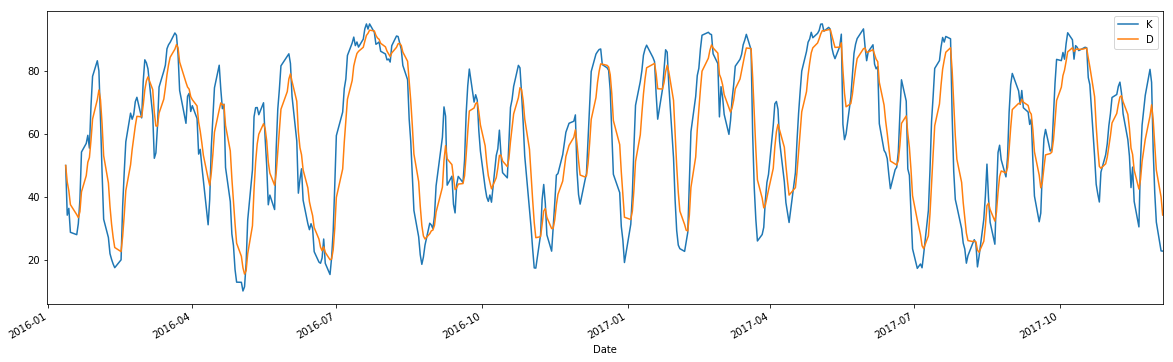

In [191]:
df[['K', 'D']].plot(legend='best', figsize=(20,6))

# Q5.策略回測